<a href="https://colab.research.google.com/github/coderzaman/Machine-Learning/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction Project  

Dataset: **Heart Failure Prediction** from Kaggle (`heart.csv`)

Link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download

In this notebook we will go step by step through:

### Exploratory Data Analysis (EDA)
- Understanding data distributions, correlations, and patterns  
- Visualizing data with histograms, scatter plots, heatmaps, and pairplots  
- Identifying data imbalance and relationships between variables  
- EDA best practices before model building  


## 1. Setup and Data Loading

In this section we will:

1. Import basic libraries  
2. Upload and load the `heart.csv` file  
3. Take a first quick look at the data

In [27]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set(font_scale=1.1)

from google.colab import drive

In [28]:
# Link File From Drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Take a first quick look at the data
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


**Attribute Information:**

* Age: age of the patient [years]

* Sex: sex of the patient [M: Male, F: Female]

* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

* RestingBP: resting blood pressure [mm Hg]

* Cholesterol: serum cholesterol [mm/dl]

* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

* Oldpeak: oldpeak = ST [Numeric value measured in depression]

* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

* HeartDisease: output class [1: heart disease, 0: Normal]

In [30]:
# Basic info about rows, columns, and data types
print("Shape: ", df.shape)

Shape:  (918, 12)


In [31]:
print("Info: ")
print(df.info())

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [32]:
# Quick descriptive statistics for numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## 2. Define Target and Feature Types

We will explicitly define which columns are numeric and which are categorical. This helps keep the rest of the notebook clean and less error prone.

In [33]:
target_col = "HeartDisease"
numeric_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',  'Oldpeak']
categoric_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


print("Target Column:", target_col)
print("Numeric Columns:", numeric_col)
print("Categoric Columns:", categoric_col)

Target Column: HeartDisease
Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categoric Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


> Insight: Explicitly listing numeric and categorical features makes your work reproducible. It also forces you to think about each column and its meaning, which is a key habit in serious ML projects.

# Exploratory Data Analysis (EDA)

## 3. Missing Values and Basic Quality Checks

In [34]:
# Check missing values count per column
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


> Insight: Even if the dataset description claims there are no missing values, always verify. Real world data often breaks promises.

In [35]:

df[numeric_col].agg(['min', 'max', 'mean', 'median', 'std']).T

,min,max,mean,median,std
Age,28.0,77.0,53.510893,54.0,9.432617
RestingBP,0.0,200.0,132.396514,130.0,18.514154
Cholesterol,0.0,603.0,198.799564,223.0,109.384145
FastingBS,0.0,1.0,0.233115,0.0,0.423046
MaxHR,60.0,202.0,136.809368,138.0,25.460334
Oldpeak,-2.6,6.2,0.887364,0.6,1.066570


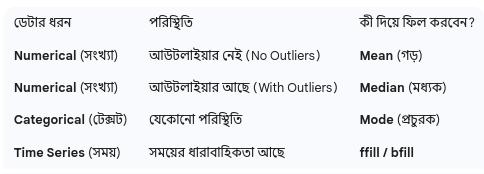

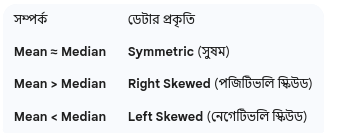

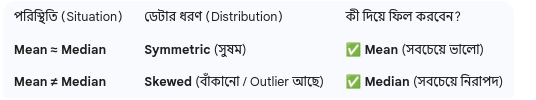

In [36]:
# check unique value for categorical Column

for c in categoric_col:
  print(c, df[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


> Insight: Look for impossible or suspicious ranges such as zero cholesterol or resting blood pressure that is extremely low or high. These may be data entry issues or special codes that you need to treat carefully.

## 4. Understanding Distributions with Histograms and Boxplots

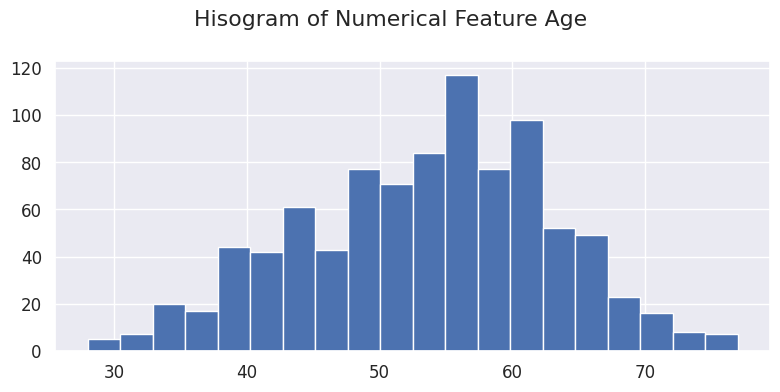

In [37]:
# Histogram of Numeric Fetures
df["Age"].hist(bins=20, figsize=(8,4))
plt.suptitle("Hisogram of Numerical Feature Age")
plt.tight_layout()
plt.show()

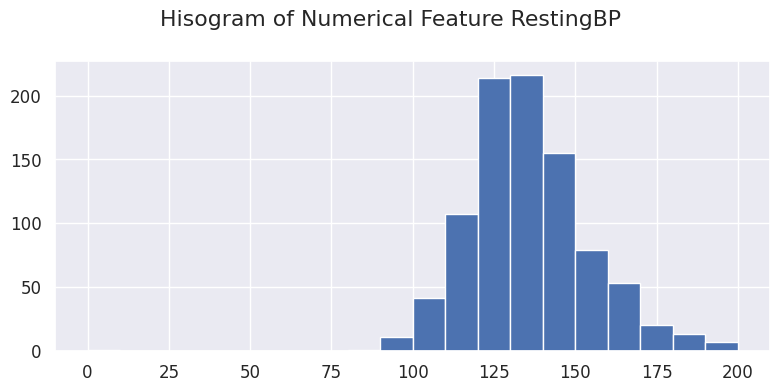

In [38]:
# Histogram of Numeric Fetures
df["RestingBP"].hist(bins=20, figsize=(8,4))
plt.suptitle("Hisogram of Numerical Feature RestingBP")
plt.tight_layout()
plt.show()

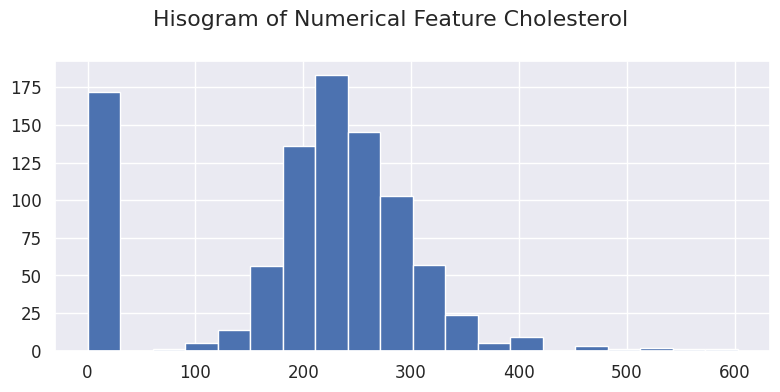

In [39]:
# Histogram of Numeric Fetures
df["Cholesterol"].hist(bins=20, figsize=(8,4))
plt.suptitle("Hisogram of Numerical Feature Cholesterol")
plt.tight_layout()
plt.show()

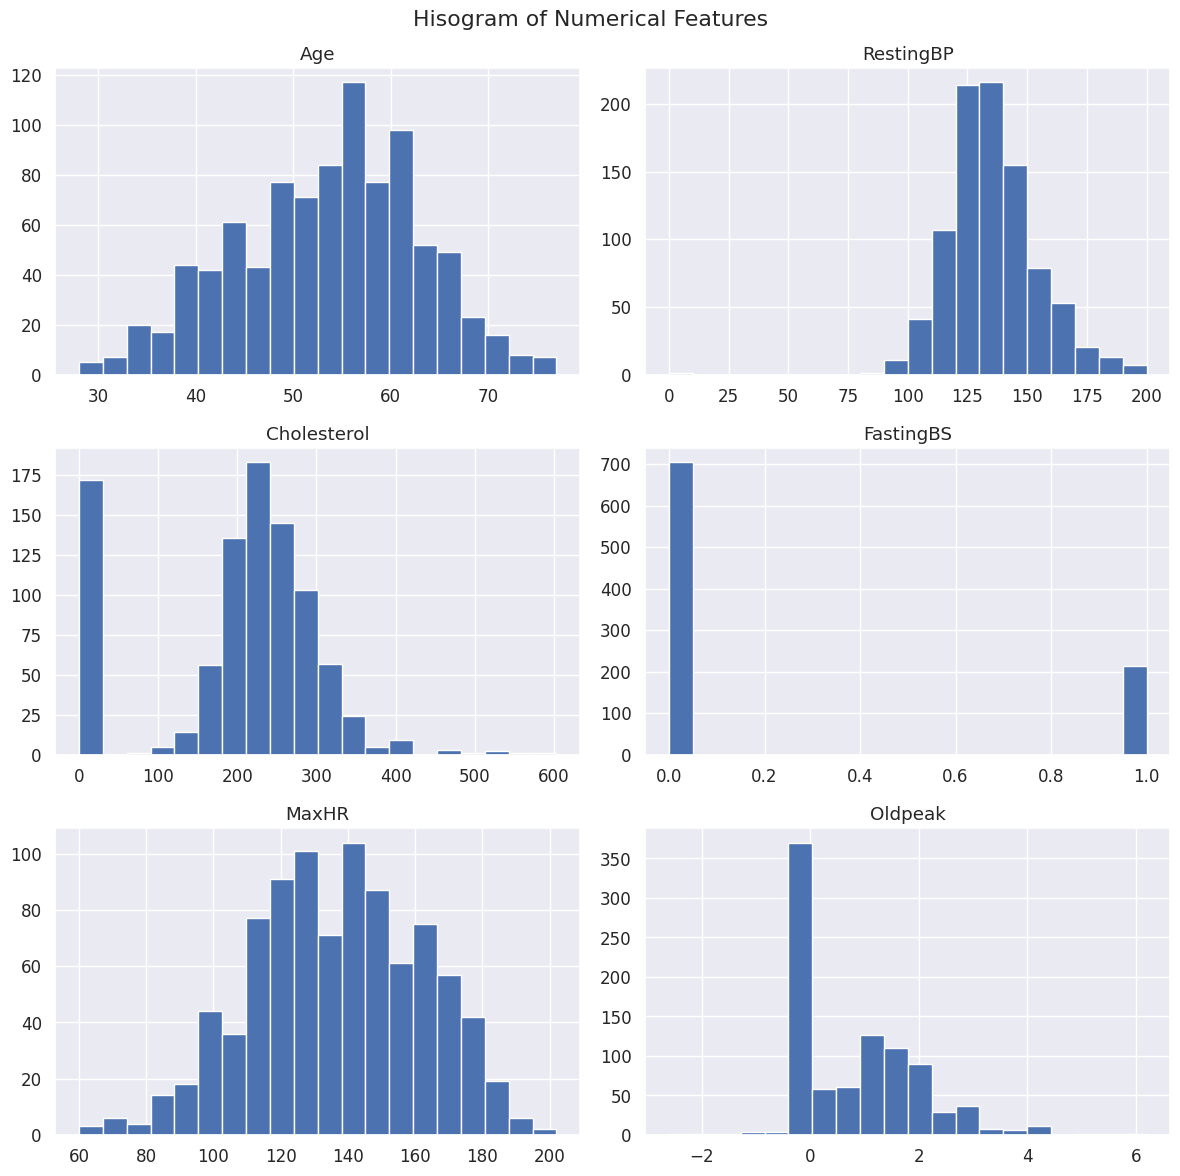

In [40]:
df[numeric_col].hist(bins=20, figsize=(12,12))
plt.suptitle("Hisogram of Numerical Features")
plt.tight_layout()
plt.show()

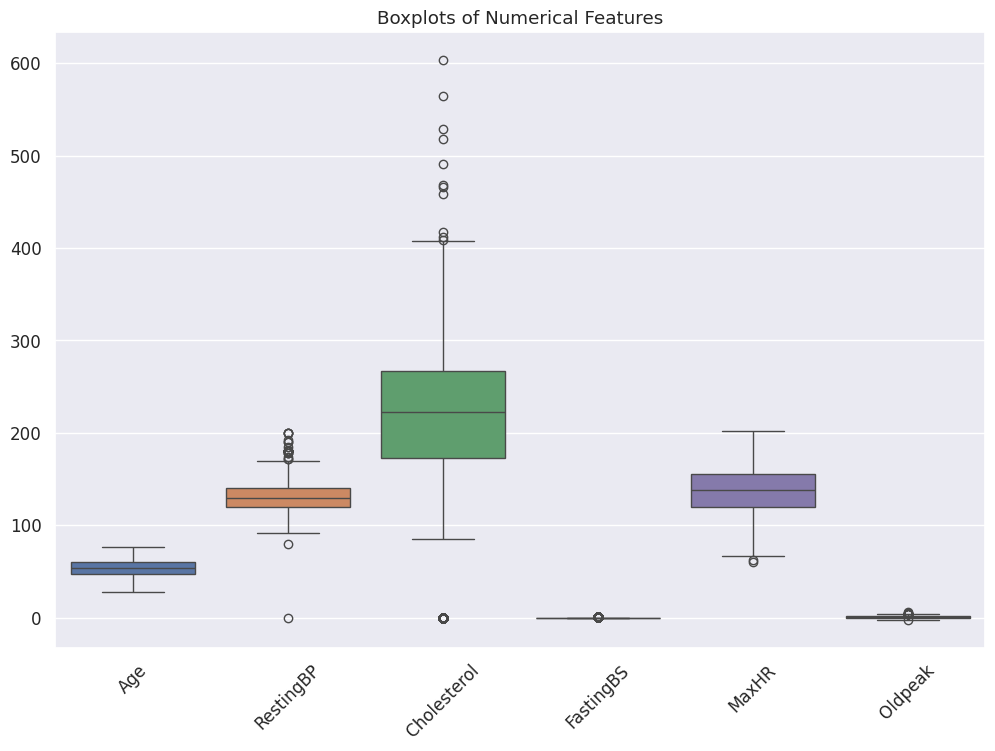

In [41]:
# Boxplots to get a sense of spread and possible outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=df[numeric_col])
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

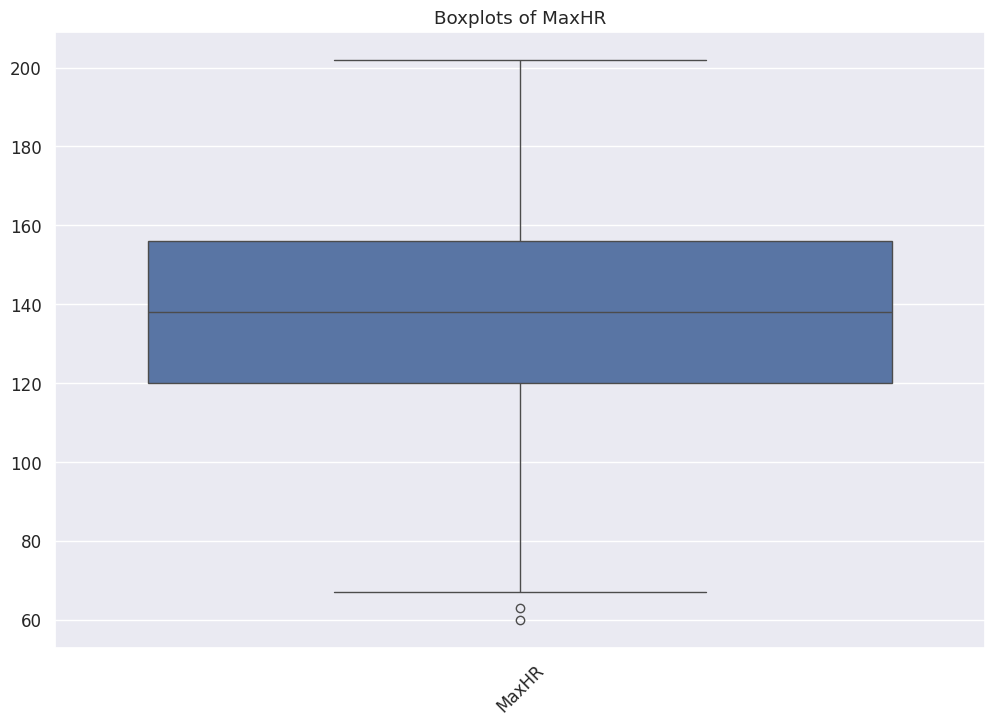

In [42]:
# Boxplots to MaxHR
plt.figure(figsize=(12,8))
sns.boxplot(data=df[["MaxHR"]])
plt.title("Boxplots of MaxHR")
plt.xticks(rotation=45)
plt.show()

## 5. Target Distribution and Class Imbalance

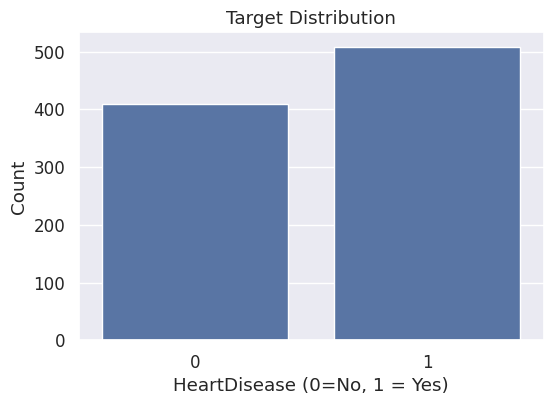

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="HeartDisease")
plt.title("Target Distribution")
plt.xlabel("HeartDisease (0=No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [44]:
df[target_col].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.553377
0,0.446623


> Insight: If one class dominates heavily, you may need resampling strategies or class weighted models later. Even if the imbalance is moderate, it is critical to be aware of it before you start modeling.

## 6. Categorical Feature Exploration

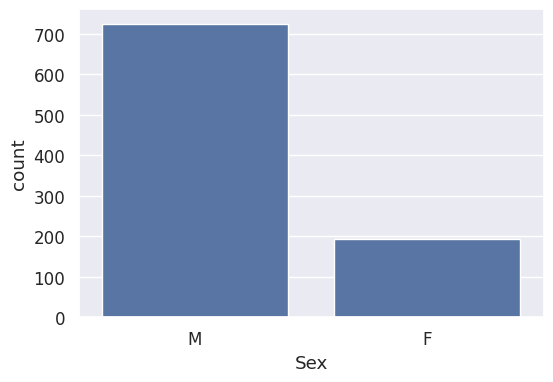

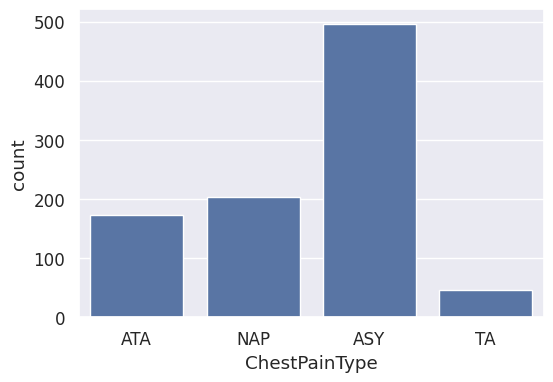

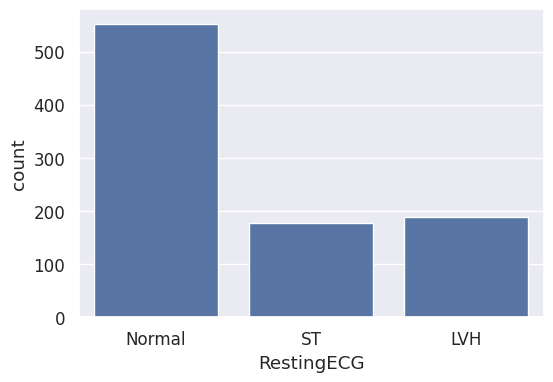

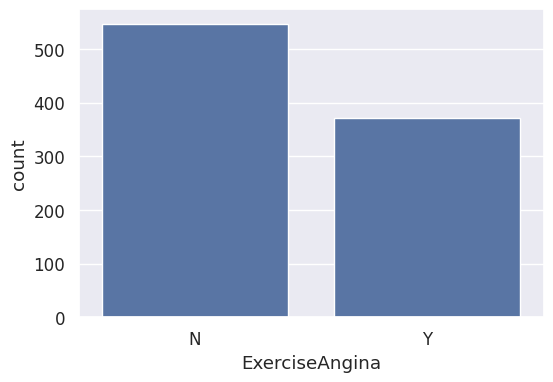

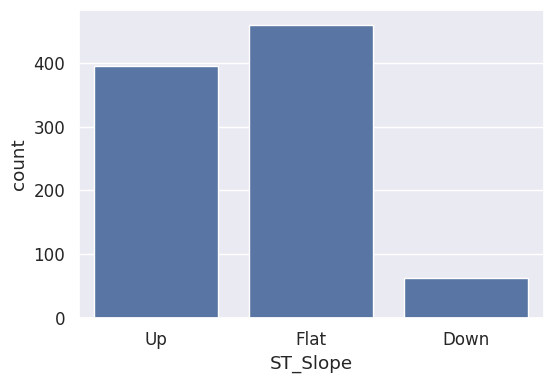

In [45]:
for c in categoric_col:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df[categoric_col], x=c)

> Insight: For categorical variables, check if some categories have very few samples. Rare categories can be merged, encoded carefully, or sometimes dropped if they add noise instead of signal.

## 7. Relationships Between Features and Target

We will first visualize numeric features against the target and then look at correlations.

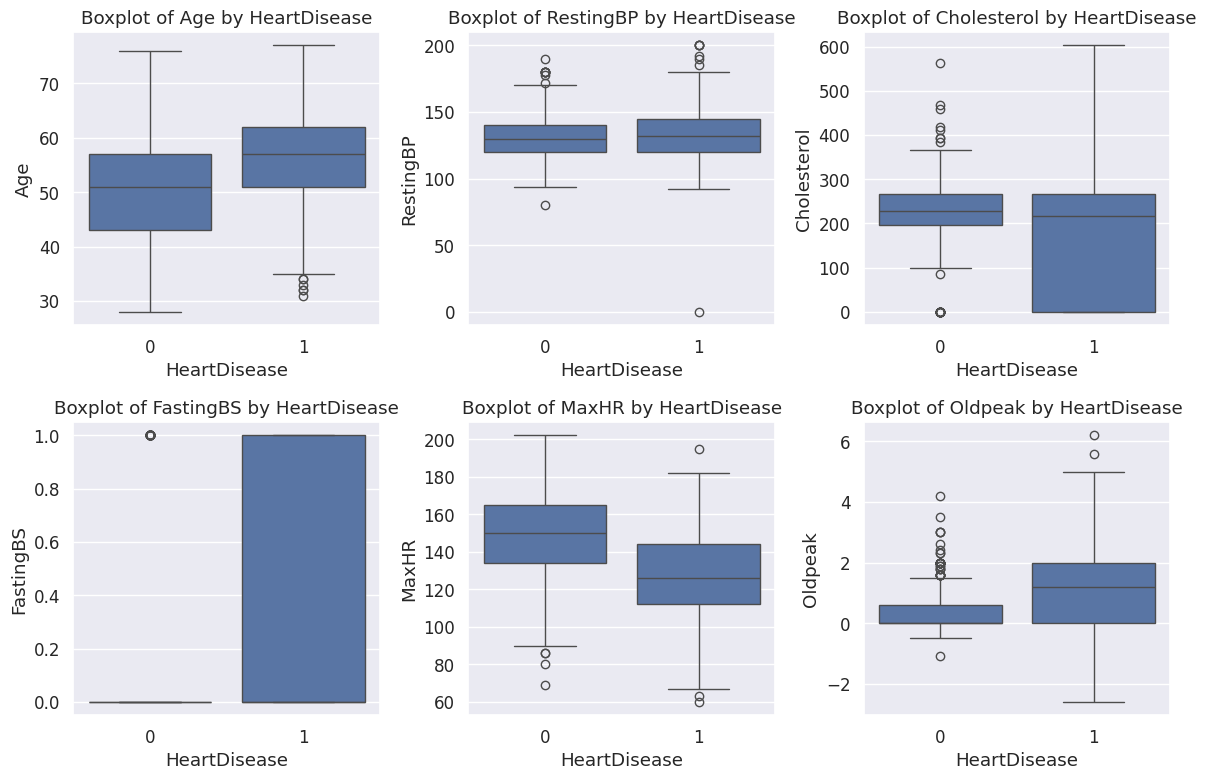

In [46]:
# Boxplots of numeric features split by HeartDisease
plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_col,1):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[target_col], y=df[col])
  plt.title(f"Boxplot of {col} by HeartDisease")
  plt.xlabel("HeartDisease")
  plt.ylabel(col)
  plt.tight_layout()

plt.show()


> Insight: Large differences in distributions between target classes often signal strong predictive potential. If the distributions are almost identical, that feature may be less useful on its own.

### 7.1 Pairplot for a Subset of Features

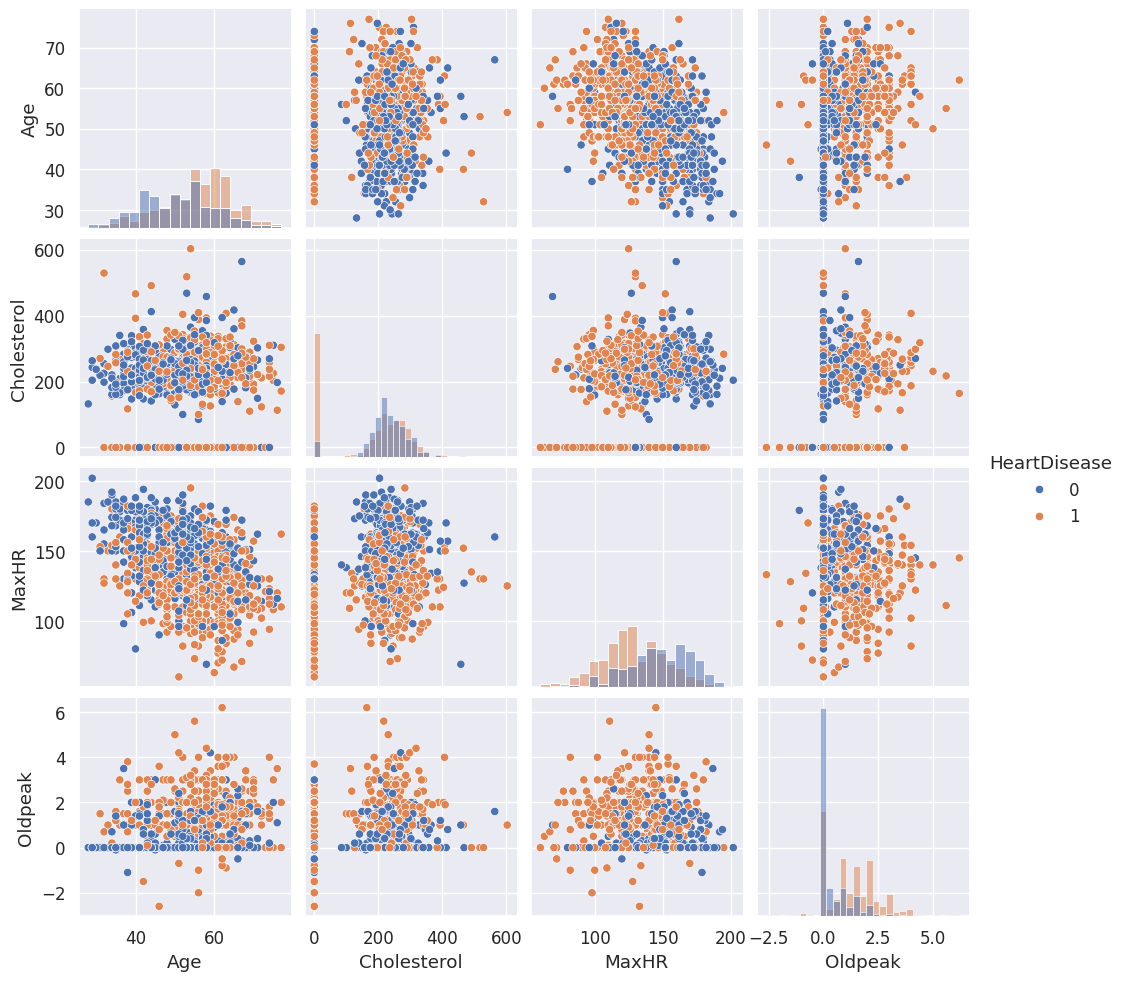

In [49]:
#Pairplot for a Subset of Features
sns.pairplot(df[["Age","Cholesterol","MaxHR", "Oldpeak", "HeartDisease"]],hue="HeartDisease", diag_kind="hist")
plt.show()

> Insight: Pairplots are expensive but powerful for small to medium sized datasets. Use them on a subset of features that you suspect are important, not on every column.

### 7.2 Correlation Matrix and Heatmap

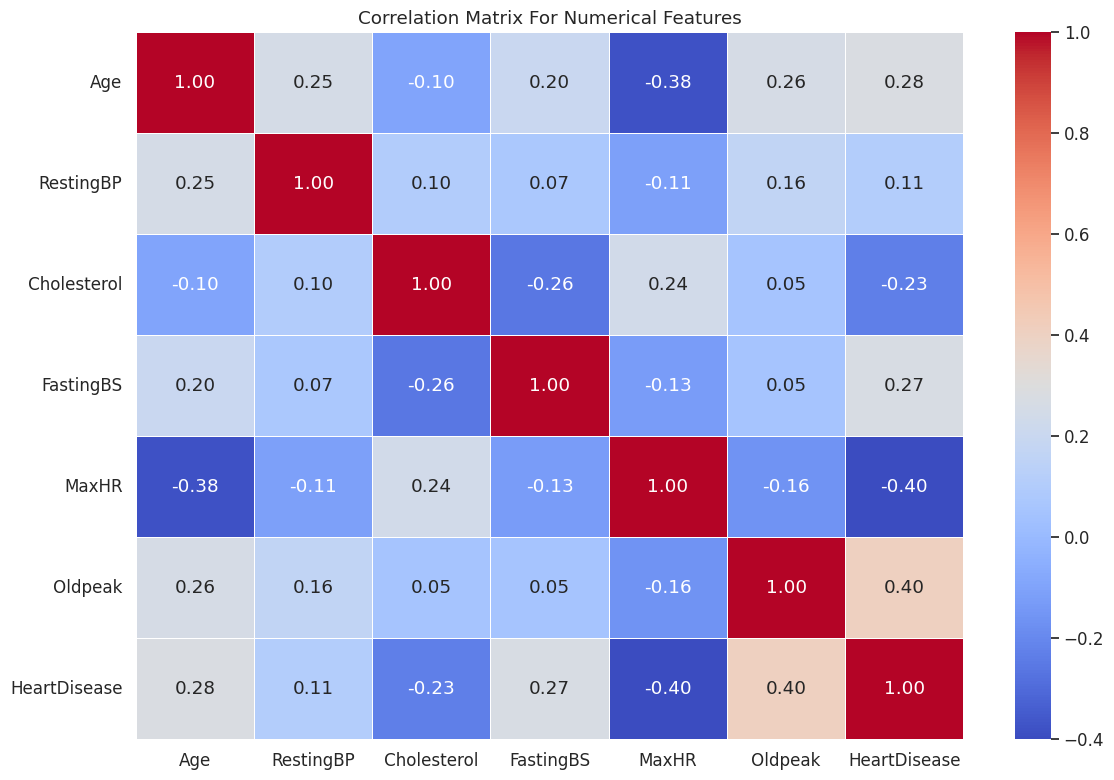

In [59]:
# Coorelation matrix and Heatmap
coor_matrix = df[numeric_col + [target_col]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(coor_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix For Numerical Features")
plt.tight_layout()
plt.show()

In [60]:
coor_matrix[target_col].sort_values(ascending=False)

,HeartDisease
HeartDisease,1.000000
Oldpeak,0.403951
Age,0.282039
FastingBS,0.267291
RestingBP,0.107589
Cholesterol,-0.232741
MaxHR,-0.400421


> Insight: High absolute correlation with the target is interesting, but do not ignore low correlation features. Some of them can become powerful in combination with others. Also watch for high correlation between predictors, which may indicate redundancy.

### ১. কোরিলেশন ম্যাট্রিক্স তৈরি করা

```python
coor_matrix = df[numeric_col + [target_col]].corr()

```

* **`df[...]`**: এখানে আমরা ডেটাসেট থেকে নির্দিষ্ট কলামগুলো বেছে নিচ্ছি।
  * **`numeric_col + [target_col]`**: আপনার ইনপুট ফিচারগুলো (`numeric_col`) এবং আউটপুট বা টার্গেট (`target_col`)—এই দুই ধরনের কলামকে একসাথে যোগ করে একটি লিস্ট বানানো হচ্ছে। উদ্দেশ্য হলো, ইনপুটের সাথে ইনপুটের সম্পর্ক এবং ইনপুটের সাথে টার্গেটের সম্পর্ক দেখা।
  * **`.corr()`**: এটি হলো মূল ফাংশন যা **Correlation (সম্পর্ক)** হিসাব করে।
  * এটি **-১ থেকে +১** এর মধ্যে একটি সংখ্যা দেয়।
  * **+1:** পজিটিভ সম্পর্ক (একটা বাড়লে অন্যটা বাড়ে)।
  * **-1:** নেগেটিভ সম্পর্ক (একটা বাড়লে অন্যটা কমে)।
  * **0:** কোনো সম্পর্ক নেই।



---

### ২. ছবির সাইজ ঠিক করা

```python
plt.figure(figsize=(12,8))

```

* **`plt.figure()`**: একটি ক্যানভাস বা ড্রয়িং বোর্ড তৈরি করে।
  * **`figsize=(12,8)`**: ছবির মাপ নির্ধারণ করে।
  * **12**: প্রস্থ (Width) ১২ ইঞ্চি।
  * **8**: উচ্চতা (Height) ৮ ইঞ্চি।
  * এটি করা জরুরি যাতে ভেতরের ছোট ছোট সংখ্যাগুলো স্পষ্টভাবে পড়া যায়।



---

### ৩. হিটম্যাপ আঁকা (সবচেয়ে গুরুত্বপূর্ণ লাইন)

```python
sns.heatmap(coor_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

```

এখানে `sns.heatmap` ফাংশনটি সংখ্যার ম্যাট্রিক্সকে রঙের গ্রাফে পরিণত করে। প্যারামিটারগুলোর কাজ নিচে দেওয়া হলো:

  * **`coor_matrix`**: এটি হলো সেই ডেটা যা আমরা প্লট করতে চাই (লাইন ১ এ যা বানিয়েছি)।
  * **`annot=True` (Annotation)**:
  * **True:** বক্সের ভেতরে কোরিলেশনের মান (যেমন: 0.85, -0.42) লেখা দেখাবে।
  * **False:** কোনো সংখ্যা দেখাবে না, শুধু রং দেখাবে। (সংখ্যা দেখাটা জরুরি, তাই True রাখা হয়)।


  * **`cmap="coolwarm"` (Colormap)**:
  * এটি রঙের থিম ঠিক করে। **"coolwarm"** মানে হলো:
  * **Cool (নীল):** নেগেটিভ বা কম সম্পর্কের জন্য।
  * **Warm (লাল):** পজিটিভ বা বেশি সম্পর্কের জন্য।


  * এর ফলে এক নজরেই লাল রং দেখে বোঝা যায় কোথায় সম্পর্ক বেশি।


  * **`linewidths=0.5`**:
  * প্রতিটি ছোট বক্সের মাঝখানে ০.৫ সাইজের একটি সাদা বর্ডার বা ফাঁকা জায়গা তৈরি করে। এতে বক্সগুলো একটার সাথে আরেকটা লেগে যায় না, দেখতে পরিষ্কার লাগে।



---

### ৪. টাইটেল এবং ডিসপ্লে

```python
plt.title("Correlation Matrix")
plt.show()

```

* **`plt.title(...)`**: গ্রাফের একদম উপরে একটি শিরোনাম দেয়।
* **`plt.show()`**: মেমোরিতে তৈরি হওয়া গ্রাফটি আপনার স্ক্রিনে প্রদর্শন করে।

### এই গ্রাফ থেকে আপনি কী খুঁজবেন?

গ্রাফটি দেখার সময় আপনি খুঁজবেন **Target Variable** এর সাথে কোন ফিচারটির ঘরের রং সবচেয়ে বেশি **গাঢ় লাল** (Strong Positive) অথবা **গাঢ় নীল** (Strong Negative)। সেগুলোই আপনার মডেলের জন্য সবচেয়ে গুরুত্বপূর্ণ ফিচার।

## 📝 **Note: Feature Selection using Correlation Matrix**

**মূল কনসেপ্ট:**
যখন দুটি ইনপুট ফিচার (Independent Variables) একে অপরের সাথে খুব শক্তিশালী সম্পর্কযুক্ত হয়, তখন আমরা বলি তাদের মধ্যে **Multicollinearity** আছে। আমাদের লক্ষ্য হলো এই ডুপ্লিকেট তথ্য বাদ দেওয়া।

#### ১. Threshold বা সীমানা কত ধরব?

সাধারণত ইন্ডাস্ট্রিতে **৮৫% (0.85)** বা **৯০% (0.90)** এর উপরের কোরিলেশনকে "High Correlation" ধরা হয়।

* তবে আপনার ডেটা যদি অনেক বেশি হয় (High Dimensional), তবে **৭৫% (0.75)** ধরলেও ভুল হবে না। এটি প্রোজেক্টের ওপর নির্ভর করে।

#### ২. ডিসিশন নেওয়ার স্টেপ-বাই-স্টেপ গাইড

ধরি, আমাদের দুটি ফিচার আছে: **Feature A** এবং **Feature B**।

* **Step 1: ফিচার-টু-ফিচার চেক (Feature vs Feature)**
প্রথমে দেখব `Feature A` এবং `Feature B` এর মধ্যে কোরিলেশন কত।
* যদি `Corr(A, B) > 0.85` (বা আপনার সেট করা 0.75) হয়, তার মানে এরা একে অপরের "যমজ ভাই" বা ডুপ্লিকেট। এদের যেকোনো একটিকে বাদ দিতে হবে।


* **Step 2: ফিচার-টু-টার্গেট চেক (Feature vs Target)**
এখন সিদ্ধান্ত নিতে হবে কাকে রাখব? এর জন্য আমরা চেক করব কার সাথে **Target Variable**-এর সম্পর্ক বেশি ভালো।
* `Corr(Feature A, Target)` = ০.৬০
* `Corr(Feature B, Target)` = ০.৫৫


* **Step 3: ফাইনাল অ্যাকশন (The Decision)**
যেহেতু `Feature A` টার্গেটের সাথে বেশি সম্পর্কযুক্ত, তাই আমরা **Feature A কে রাখব** এবং **Feature B কে ড্রপ (Drop) করে দেব**।

#### ৩. কেন আমরা এমন করি? (Why?)

* **Overfitting রোধ করা:** মডেল অপ্রয়োজনীয় জটিলতা থেকে মুক্তি পায়।
* **Faster Training:** ফিচার কমলে মডেল দ্রুত ট্রেন হয়।
* **Better Interpretability:** মডেলের ফলাফল ব্যাখ্যা করা সহজ হয়।

---

### একটি উদাহরণ (Example Scenario)

ধরুন আপনি বাড়ির দাম প্রেডিক্ট করছেন। আপনার ডেটাসেটে দুটি কলাম আছে:

1. `square_feet` (বর্গফুট)
2. `num_rooms` (রুমের সংখ্যা)

**Observation:**

* স্বাভাবিকভাবেই, যার স্কয়ার ফিট বেশি, তার রুম সংখ্যাও বেশি হবে। এদের নিজেদের কোরিলেশন হয়তো **৯০% (0.90)**।
* এখন আপনি দেখলেন বাড়ির দামের (Price) সাথে:
* `square_feet` এর কোরিলেশন **০.৮৫**
* `num_rooms` এর কোরিলেশন **০.৭০**



**Decision:**
যেহেতু `square_feet` এবং `num_rooms` একই ধরণের তথ্য দিচ্ছে (দুটোই বাড়ির সাইজ বোঝাচ্ছে), কিন্তু `square_feet` দামের সাথে বেশি স্ট্রংলি কানেক্টেড—তাই আমরা **`num_rooms` কলামটি ডিলিট করে দেব**।

### শর্টকাট টিপস (Pro Tip)

কোড করার সময় সবসময় `abs()` বা পরম মান ব্যবহার করবেন। কারণ কোরিলেশন **-০.৯ (Negative 0.9)** হলেও সেটা হাই কোরিলেশন।

### 7.3 Categorical Features vs Target


Proportion of HeartDeisease within Sex


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


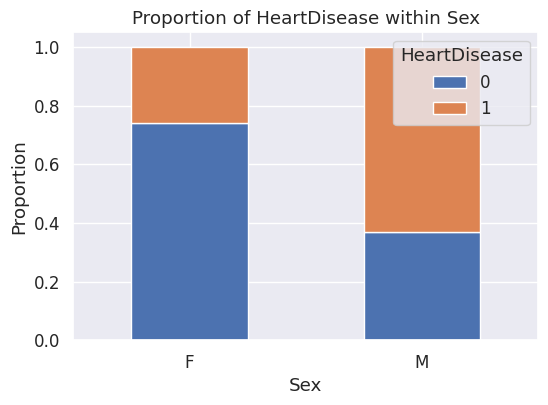


Proportion of HeartDeisease within ChestPainType


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


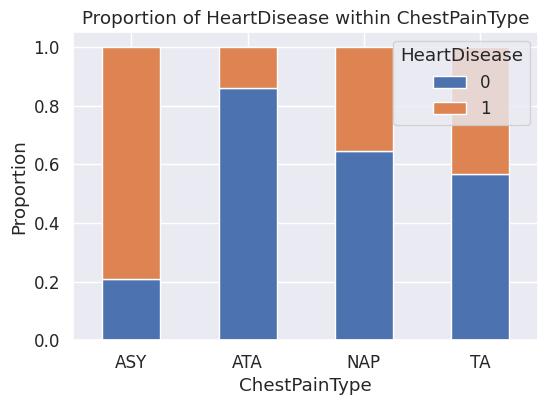


Proportion of HeartDeisease within RestingECG


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


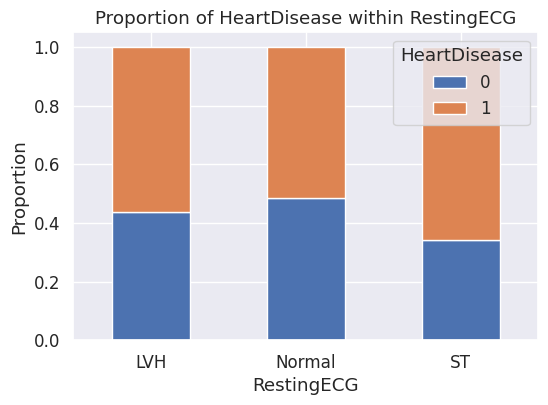


Proportion of HeartDeisease within ExerciseAngina


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


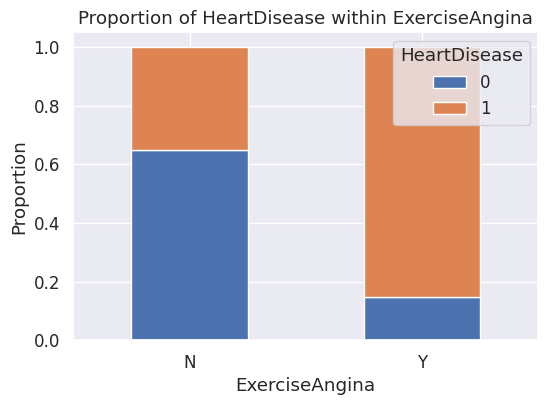


Proportion of HeartDeisease within ST_Slope


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


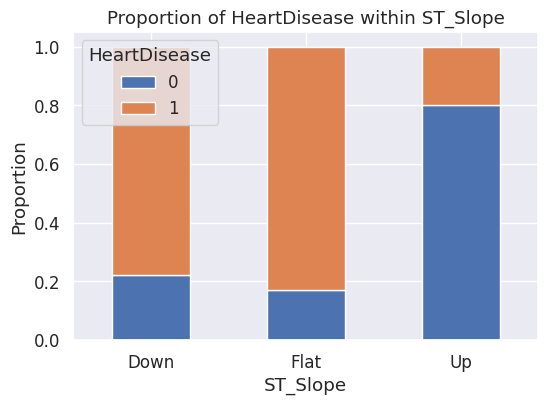

In [68]:
# Categorical Features vs Target
for c in categoric_col:
  ct = pd.crosstab(df[c], df[target_col], normalize="index")
  print(f"\nProportion of HeartDeisease within {c}")
  display(ct)

  ct.plot(kind="bar", stacked=True, figsize=(6,4))
  plt.title(f"Proportion of HeartDisease within {c}")
  plt.xlabel(c)
  plt.xticks(rotation=0)
  plt.ylabel("Proportion")
  plt.show()